<a href="https://colab.research.google.com/github/CoWoGeo/PUS2022_CWolk/blob/main/ProjectLanthamWolk/JunkyardFireModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Libraries

In [1]:
!apt install python3-rtree

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
The following additional packages will be installed:
  libspatialindex-c4v5 libspatialindex-dev libspatialindex4v5
  python3-pkg-resources
Suggested packages:
  python3-setuptools
The following NEW packages will be installed:
  libspatialindex-c4v5 libspatialindex-dev libspatialindex4v5
  python3-pkg-resources python3-rtree
0 upgraded, 5 newly installed, 0 to remove and 20 not upgraded.
Need to get 671 kB of archives.
After this operation, 3,948 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libspatialindex4v5 amd64 1.8.5-5 [219 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libspatialindex-c4v5 amd64 1.8.5-5 [51.7 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/main amd64 python3-pkg

In [2]:
! pip install shapely

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
!pip install cartoframes

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 245 kB 12.9 MB/s 
     |████████████████████████████████| 1.1 MB 45.1 MB/s 
     |████████████████████████████████| 235 kB 76.1 MB/s 
     |████████████████████████████████| 16.6 MB 59.1 MB/s 
     |████████████████████████████████| 7.8 MB 62.7 MB/s 
  Created wheel for carto: filename=carto-1.11.3-py3-none-any.whl size=35088 sha256=f41b6f5ae729846a1eb2b2f14df0ca2e1cc57e6f97d10ecdd5fe965ac9235f6d
  Stored in directory: /root/.cache/pip/wheels/6b/a3/41/90fa4334cd280f91d17226f36db7a34b12902f7e5b281afb84
  Created wheel for pyrestcli: filename=pyrestcli-0.6.11-py3-none-any.whl size=8496 sha256=d42e5029d7b9fa430f3a35f04cf78dc362d885fbb2596701bd92884ccfaa1d6c
  Stored in directory: /root/.cache/pip/wheels/92/fc/98/2e46573b8e1bbe953345578314c765d3ecdc9532450bb90d79
Successfully built carto pyrestcli


In [4]:
!pip install geopandas
import geopandas as gpd

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
import pandas as pd
import cartoframes as cf
import matplotlib.pyplot as plt
from shapely.geometry import Point
import numpy as np

# Importing the Data for Our Model

## Data we want to end up with:

*   Fire yes/no (our target variable)

### Geographic and Parcel Data
*   Parcel (our object)
*   Fire yes/no (our target variable)
*   Geography (for mapping)
*   Map section (one-hot encoded)
*   Zip code (one-hot encoded)
*   If parcel is under Dept of Revenue review (n/a, completed, in progress, one-hot encoded)
*   If parcel is under Philadelphia Water Dept review (n/a, completed, in progress, one-hot encoded)

### Philadelphia Business Licenses at Parcel
*   Number of business licenses (numeric)
*   Type of business licenses (one-hot encoded)

### L&I Violations at Parcel
*   Number of violations(?)
*   Responsible agency for violation (one-hot encoded)
*   Violation case priority (one-hot encoded)

### DEP Water Permit Data (does not exist for all locations)



### Land Recycling Data (does not exist for all locations)

## Junkyard Business Licenses - All

In [6]:
licenses = gpd.GeoDataFrame.from_file("https://github.com/CoWoGeo/PUS2022_CWolk/raw/main/ProjectLanthamWolk/PhillyBusinessLicensesOHE.geojson")

In [7]:
licenses.head()

,parcel_full,licensetype_count,map_section_004N24,map_section_009S06,map_section_013S18,map_section_015S16,map_section_021N04,map_section_024N24,map_section_025S13,map_section_026S04,...,zip_19153-3506,zip_19153-3507,zip_19153-3508,zip_19153-3513,zip_19153-3516,zip_19153-3522,zip_19153-3524,zip_19153-3529,zip_19153-3588,geometry
0,047S110010,5,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,"POLYGON ((2679160.849 219790.732, 2679137.703 ..."
1,047S170035,5,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,"POLYGON ((2678435.960 218926.501, 2678379.218 ..."
2,047S170026,5,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,"POLYGON ((2679159.954 219790.563, 2679136.835 ..."
3,047S210023,6,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,"POLYGON ((2680829.298 223301.310, 2680808.700 ..."
4,047S210044,6,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,"POLYGON ((2680825.903 223299.337, 2680819.922 ..."


In [8]:
licenses.crs

<Derived Projected CRS: EPSG:2272>
Name: NAD83 / Pennsylvania South (ftUS)
Axis Info [cartesian]:
- X[east]: Easting (US survey foot)
- Y[north]: Northing (US survey foot)
Area of Use:
- name: United States (USA) - Pennsylvania - counties of Adams; Allegheny; Armstrong; Beaver; Bedford; Berks; Blair; Bucks; Butler; Cambria; Chester; Cumberland; Dauphin; Delaware; Fayette; Franklin; Fulton; Greene; Huntingdon; Indiana; Juniata; Lancaster; Lawrence; Lebanon; Lehigh; Mifflin; Montgomery; Northampton; Perry; Philadelphia; Schuylkill; Snyder; Somerset; Washington; Westmoreland; York.
- bounds: (-80.53, 39.71, -74.72, 41.18)
Coordinate Operation:
- name: SPCS83 Pennsylvania South zone (US Survey feet)
- method: Lambert Conic Conformal (2SP)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

## Locations as Key

Making a list of junkyard license parcels to check the DEP data and fires for matches.

In [9]:
#extracting just the parcel numbers for junkyard locations
junklocations = licenses[["parcel_full"]]

In [10]:
junklocations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168 entries, 0 to 167
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   parcel_full  168 non-null    object
dtypes: object(1)
memory usage: 1.4+ KB


In [11]:
#turning the parcels into a list for later operations
junklocations = junklocations.parcel_full.values.tolist()

## Fire Locations

Liz manually made this list of junkyard fires that made the news from 2018- through researching past news coverage and then tracking down the locations. She then got the parcel numbers on the Philly Atlas public government website. The columns about licenses are mostly for if we decide to do more with this data in the future.

In [12]:
fires = pd.read_csv("https://github.com/CoWoGeo/PUS2022_CWolk/raw/main/ProjectLanthamWolk/PhillyFireLocations.csv")

In [13]:
fires

,company_name,has_junkyard_license,parcel_full,has_any_licenses,has_hazmat_license
0,Titan Auto Recycling,Yes,044N080163,Yes,NaN
1,Titan Auto Recycling,Yes,044N070161,Yes,NaN
2,SD Richman and Sons,Yes,078N150014,Yes,NaN
3,Waste Management - Philadelphia Transfer Station,No,009S090011,Yes,NaN
4,Nicholas Scrap Metal,Yes,101N070226,Yes,NaN
5,Delaware Valley Recycling,No,047S220031,Yes,NaN
6,Multiple - ABM Automotive or AL's Auto Services,No,023S090332,Yes,NaN
7,Gold Medal Enviomental,No,037S090011,Yes,NaN
8,McCarthy Tire Service,No,025N150065,No,NaN
9,Thim Export,No,116N030022,yes,NaN


In [14]:
junkyardfires = fires[fires["parcel_full"].isin(junklocations)]

In [15]:
junkyardfires

,company_name,has_junkyard_license,parcel_full,has_any_licenses,has_hazmat_license
0,Titan Auto Recycling,Yes,044N080163,Yes,NaN
1,Titan Auto Recycling,Yes,044N070161,Yes,NaN
2,SD Richman and Sons,Yes,078N150014,Yes,NaN
4,Nicholas Scrap Metal,Yes,101N070226,Yes,NaN
10,Orthodox Auto Company,Yes,111N220010,Yes,NaN
13,Philadelphia Metal and Resource Recovery,Yes,066N100089,Yes,NaN
14,H&H Auto Sales and Repair Services Inc.,Yes,044N080163,Yes,NaN


Only 7/18 fires are matches for junkyard license locations, including inactive licenses! It's possible we missed licenses through problems with records or not identifying the correct location for the fire, but Liz was thorough, and searches of some locations found past citations for operating without any licenses.

In [16]:
junkyardfires = junkyardfires[["parcel_full"]]
junkyardfires

,parcel_full
0,044N080163
1,044N070161
2,078N150014
4,101N070226
10,111N220010
13,066N100089
14,044N080163


In [17]:
# adding a binary value for fire
junkyardfires["Fire"] = 1

<ipython-input-17-e583f7897fa8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  junkyardfires["Fire"] = 1


In [18]:
junkyardfires.reset_index(drop=True, inplace=True)
junkyardfires

,parcel_full,Fire
0,044N080163,1
1,044N070161,1
2,078N150014,1
3,101N070226,1
4,111N220010,1
5,066N100089,1
6,044N080163,1


Coryn realized that one parcel is a repeat in the list after importing. This problem came from three fires on one block, four years apart. The address of all three fires, 390 W. Sedgely Ave, is one of the tricky ones with two parcels to the same address. There are also two junkyards at this address that have had fires! So: 3 fires, 2 junkyards, 2 parcels, 1 address. This gives an idea of how messy this data is. If you look at the parcel in Atlas, you can see how strange the parcel and its layout are--and that a junkyard has piles of cars in the transportation easement. Since we're not counting fires, we just used the two parcels for the three fires here.

Example fire:  https://www.cbsnews.com/philadelphia/news/north-philadelphia-junkyard-fire-3-alarms/

Philly Atlas entry: https://atlas.phila.gov/390%20W%20SEDGLEY%20AVE/deeds

In [19]:
# discovered one parcel was a repeat, checked our research
junkyardfires.drop_duplicates(inplace=True, keep='first')

/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [20]:
junkyardfires

,parcel_full,Fire
0,044N080163,1
1,044N070161,1
2,078N150014,1
3,101N070226,1
4,111N220010,1
5,066N100089,1


## Parcels for DEP data

In [ ]:
phillyparcels = gpd.GeoDataFrame.from_file("https://opendata.arcgis.com/datasets/1c57dd1b3ff84449a4b0e3fb29d3cafd_0.zip")[["MAPREG", "geometry"]]

In [ ]:
print("The CRS of Philly parcels is" , phillyparcels.crs)

In [23]:
phillyparcels = phillyparcels.to_crs(2272)

In [24]:
print("The CRS of Philly parcels is" , phillyparcels.crs)

The CRS of Philly parcels is epsg:2272


## DEP Water Data

In [25]:
depwater = gpd.GeoDataFrame.from_file("https://github.com/CoWoGeo/PUS2022_CWolk/raw/main/ProjectLanthamWolk/PhillyDEPwater.geojson")

In [26]:
print("The CRS of DEP Water Data" , depwater.crs)

The CRS of DEP Water Data epsg:2272


In [27]:
depwater

,PRIMARY__2,SITE_STATU,CLIENT_REL,COMPLIANCE,geometry
0,WATER POLLUTION CONTROL FACILITY,ACTIVE,Owner,YES,POINT (2732592.197 297479.967)
1,WATER POLLUTION CONTROL FACILITY,ACTIVE,Owner,NO,POINT (2737861.225 291691.754)
2,WATER POLLUTION CONTROL FACILITY,ACTIVE,Owner,YES,POINT (2737844.126 291716.530)
3,WATER POLLUTION CONTROL FACILITY,ACTIVE,Owner,YES,POINT (2737640.722 292081.743)
4,WATER POLLUTION CONTROL FACILITY,ACTIVE,Owner,YES,POINT (2737557.175 292168.233)
...,...,...,...,...,...
582,WATER POLLUTION CONTROL FACILITY,ACTIVE,Owner,YES,POINT (2688452.838 211998.680)
583,WATER POLLUTION CONTROL FACILITY,ACTIVE,Owner,YES,POINT (2685830.157 211998.732)
584,WATER POLLUTION CONTROL FACILITY,ACTIVE,Owner,YES,POINT (2688659.515 212024.934)
585,WATER POLLUTION CONTROL FACILITY,ACTIVE,Owner,YES,POINT (2688677.144 212035.567)


### Matching DEP Water Data to Philly Parcels

In [28]:
depwater_p = phillyparcels.sjoin(depwater, how="inner")

In [ ]:
depwater_p.head()

In [ ]:
depwater_p.drop(columns=("index_right"), inplace=True)

In [ ]:
depwater_p.info()

In [ ]:
depwater_p.groupby("MAPREG").head()

In [ ]:
depwater_p.nunique()

There is actually only one primary_2 value ("WATER POLLUTION CONTROL FACILITY") and one client relationship (owner), so I'll drop those. Also, I had waffled about keeping compliance because it might be time-sensitive, and I think it's what is making duplicate rows for a parcel. Since we deleted all the sub-site information, too, there's no point in keeping it.

In [34]:
depwater_p = depwater_p[["MAPREG", "geometry"]]

In [35]:
depwater_p = depwater_p.drop_duplicates()
depwater_p

,MAPREG,geometry
2479,155N020024,"POLYGON ((2737858.147 285260.472, 2737689.022 ..."
27436,155N020014,"POLYGON ((2738627.518 284033.557, 2738626.991 ..."
92710,155N020052,"POLYGON ((2737998.695 286478.717, 2738258.909 ..."
573390,155N020056,"POLYGON ((2737756.653 286248.867, 2737837.344 ..."
5736,013S240012,"POLYGON ((2681915.474 228943.152, 2681861.626 ..."
...,...,...
581914,136N040139,"POLYGON ((2679447.874 273104.755, 2679509.029 ..."
588284,098N090047,"POLYGON ((2742814.833 273246.982, 2743164.762 ..."
589683,016N220014,"POLYGON ((2704165.405 241844.747, 2704151.691 ..."
600824,047S080013,"POLYGON ((2682198.535 214402.023, 2682457.346 ..."


In [36]:
depwater_p.reset_index(drop=True)

,MAPREG,geometry
0,155N020024,"POLYGON ((2737858.147 285260.472, 2737689.022 ..."
1,155N020014,"POLYGON ((2738627.518 284033.557, 2738626.991 ..."
2,155N020052,"POLYGON ((2737998.695 286478.717, 2738258.909 ..."
3,155N020056,"POLYGON ((2737756.653 286248.867, 2737837.344 ..."
4,013S240012,"POLYGON ((2681915.474 228943.152, 2681861.626 ..."
...,...,...
318,136N040139,"POLYGON ((2679447.874 273104.755, 2679509.029 ..."
319,098N090047,"POLYGON ((2742814.833 273246.982, 2743164.762 ..."
320,016N220014,"POLYGON ((2704165.405 241844.747, 2704151.691 ..."
321,047S080013,"POLYGON ((2682198.535 214402.023, 2682457.346 ..."


### Adding a little column for the one hot

In [37]:
depwater_p["DEP_water"] = 1

In [38]:
depwater_p

,MAPREG,geometry,DEP_water
2479,155N020024,"POLYGON ((2737858.147 285260.472, 2737689.022 ...",1
27436,155N020014,"POLYGON ((2738627.518 284033.557, 2738626.991 ...",1
92710,155N020052,"POLYGON ((2737998.695 286478.717, 2738258.909 ...",1
573390,155N020056,"POLYGON ((2737756.653 286248.867, 2737837.344 ...",1
5736,013S240012,"POLYGON ((2681915.474 228943.152, 2681861.626 ...",1
...,...,...,...
581914,136N040139,"POLYGON ((2679447.874 273104.755, 2679509.029 ...",1
588284,098N090047,"POLYGON ((2742814.833 273246.982, 2743164.762 ...",1
589683,016N220014,"POLYGON ((2704165.405 241844.747, 2704151.691 ...",1
600824,047S080013,"POLYGON ((2682198.535 214402.023, 2682457.346 ...",1


### Filtering by Junkyard Locations

In [39]:
depwater_junk = depwater_p[depwater_p['MAPREG'].isin(junklocations)]

In [40]:
depwater_junk

,MAPREG,geometry,DEP_water
34067,136N100072,"POLYGON ((2732380.592 265561.662, 2732387.279 ...",1
57721,047S220018,"POLYGON ((2680434.363 224442.139, 2680269.019 ...",1
161874,078N150014,"POLYGON ((2715170.058 252783.321, 2715157.056 ...",1
460297,050S210023,"POLYGON ((2678045.811 222007.468, 2678057.423 ...",1
480674,083N040066,"POLYGON ((2713971.565 256323.595, 2714014.114 ...",1
546558,047S180019,"POLYGON ((2682660.272 222860.086, 2682507.745 ...",1
547797,038N240017,"POLYGON ((2699579.811 253080.990, 2699421.584 ...",1
559085,150N240018,"POLYGON ((2672176.106 266044.413, 2672100.590 ...",1
563866,047S200090,"POLYGON ((2679525.480 222944.558, 2679465.987 ...",1
563972,047S200091,"POLYGON ((2679472.744 222927.943, 2679413.183 ...",1


In [41]:
depwater_junk.rename(columns={"MAPREG": "parcel_full"}, inplace=True)

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [42]:
depwater_junk = depwater_junk.reset_index(drop=True)

In [43]:
depwater_junk

,parcel_full,geometry,DEP_water
0,136N100072,"POLYGON ((2732380.592 265561.662, 2732387.279 ...",1
1,047S220018,"POLYGON ((2680434.363 224442.139, 2680269.019 ...",1
2,078N150014,"POLYGON ((2715170.058 252783.321, 2715157.056 ...",1
3,050S210023,"POLYGON ((2678045.811 222007.468, 2678057.423 ...",1
4,083N040066,"POLYGON ((2713971.565 256323.595, 2714014.114 ...",1
5,047S180019,"POLYGON ((2682660.272 222860.086, 2682507.745 ...",1
6,038N240017,"POLYGON ((2699579.811 253080.990, 2699421.584 ...",1
7,150N240018,"POLYGON ((2672176.106 266044.413, 2672100.590 ...",1
8,047S200090,"POLYGON ((2679525.480 222944.558, 2679465.987 ...",1
9,047S200091,"POLYGON ((2679472.744 222927.943, 2679413.183 ...",1


### Water Doesn't Need OHE!

In [44]:
#but I will drop geometry
depwater_junk = depwater_junk[["parcel_full", "DEP_water"]]
depwater_junk

,parcel_full,DEP_water
0,136N100072,1
1,047S220018,1
2,078N150014,1
3,050S210023,1
4,083N040066,1
5,047S180019,1
6,038N240017,1
7,150N240018,1
8,047S200090,1
9,047S200091,1


## DEP Land Data

In [45]:
deplandrecycling = gpd.GeoDataFrame.from_file("https://github.com/CoWoGeo/PUS2022_CWolk/raw/main/ProjectLanthamWolk/PhillyDEPlandrecycling.geojson")

In [46]:
deplandrecycling

,PRIMARY_FA,SUB_FACI_2,CLIENT_REL,COMPLIANCE,geometry
0,13625-13649 PHILMONT AVE,SOIL MEDIA,Owner,YES,POINT (2734279.342 302573.944)
1,INNOVATIVE PRINTING & LITHOGRAPHY,SOIL MEDIA,Owner,YES,POINT (2732665.445 302645.411)
2,BUDD CO DUMP,SOIL MEDIA,Owner,YES,POINT (2732665.445 302645.411)
3,INTL PAPER LIQUID PKG,SOIL MEDIA,Owner,YES,POINT (2732665.445 302645.411)
4,PHOENIX STEEL FOUNDRY BLDG,GROUNDWATER MEDIA,Owner,YES,POINT (2732432.414 303897.608)
...,...,...,...,...,...
1686,PHILA INTL AIRPORT,SOIL MEDIA,Owner,YES,POINT (2672620.169 214509.646)
1687,PHILA INTL AIRPORT,SOIL MEDIA,Owner,YES,POINT (2672620.169 214509.646)
1688,PHILA INTL AIRPORT,SOIL MEDIA,Owner,YES,POINT (2672620.169 214509.646)
1689,SUNOCO R & M MARCUS HOOK REF PHILLIPS ISLAND,SOIL MEDIA,Owner,YES,POINT (2681305.453 216175.301)


In [47]:
print("The CRS of DEP Land Recycling Data is:", deplandrecycling.crs)

The CRS of DEP Land Recycling Data is: epsg:2272


In [48]:
deplandrecycling.nunique()

PRIMARY_FA    912
SUB_FACI_2      4
CLIENT_REL      1
COMPLIANCE      1
geometry      816
dtype: int64

### Cleaning DEP Land Recycling Data

In [49]:
# dropping Client Relationship and Compliance because they had uniform values
deplandrecycling.drop(columns=(["CLIENT_REL", "COMPLIANCE"]), inplace=True)

In [50]:
#dropping the name of the facility because it's unique
deplandrecycling.drop(columns=("PRIMARY_FA"), inplace=True)

In [51]:
deplandrecycling.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 1691 entries, 0 to 1690
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   SUB_FACI_2  1691 non-null   object  
 1   geometry    1691 non-null   geometry
dtypes: geometry(1), object(1)
memory usage: 26.5+ KB


### Matching DEP Land Recycling Data to Parcels

In [52]:
deplandrecycling_p = phillyparcels.sjoin(deplandrecycling, how="inner")

In [ ]:
deplandrecycling_p.head()

In [ ]:
deplandrecycling_p.drop(columns=("index_right"), inplace=True)

In [ ]:
deplandrecycling_p.nunique()

In [ ]:
deplandrecycling_p.rename(columns = {"MAPREG":"parcel_full", 
                                     "SUB_FACI_2": "DEP_land_media"}, inplace=True)

In [ ]:
deplandrecycling_p.info()

In [ ]:
deplandrecycling_p.nunique()

In [ ]:
deplandrecycling_p.reset_index(drop=True)

In [ ]:
deplandrecycling_p1 = deplandrecycling_p.drop_duplicates(ignore_index=True)

In [ ]:
deplandrecycling_p1

In [ ]:
deplandrecycling_junk = deplandrecycling_p1[deplandrecycling_p1["parcel_full"].isin(junklocations)]

In [ ]:
deplandrecycling_junk.reset_index(drop=True)

In [ ]:
#adding a binary value for being present in this list
deplandrecycling_junk["DEP_landrecycling"] = 1

In [ ]:
deplandrecycling_junk.info()

In [ ]:
deplandrecycling_junk.nunique()

In [ ]:
deplandrecycling_junk.plot()

### One Hot Encoding the DEP Land Recycling Data

In [ ]:
depland_1he = pd.get_dummies(deplandrecycling_junk[["DEP_land_media"]]).reset_index().drop("index", axis=1)
depland_1he

In [ ]:
tmp_ = deplandrecycling_junk[["parcel_full", "DEP_landrecycling"]].reset_index().drop("index", axis=1).join(depland_1he)
tmp_.shape

In [ ]:
depland_ohe = tmp_.groupby("parcel_full").max()

In [ ]:
depland_ohe

## Philly L&I Violations

In [ ]:
violations = gpd.GeoDataFrame.from_file("https://github.com/CoWoGeo/PUS2022_CWolk/raw/main/ProjectLanthamWolk/JunkyardViolationsLess_OHE.geojson")

In [ ]:
violations.head()

In [ ]:
violations.info()

In [ ]:
violations.drop(columns=("geometry"), inplace=True)

# Combining the Data

Need to combine:

*  Business Licenses (with parcel and geometry): licenses
*  Water: depwater_junk
*  Land: depland_ohe
*  Violations: violations
*  Fire: junkyardfires




### 1. Business Licenses + Water

In [ ]:
licensewater = licenses.merge(depwater_junk, on="parcel_full", how="left")

In [77]:
licensewater

,parcel_full,licensetype_count,map_section_004N24,map_section_009S06,map_section_013S18,map_section_015S16,map_section_021N04,map_section_024N24,map_section_025S13,map_section_026S04,...,zip_19153-3507,zip_19153-3508,zip_19153-3513,zip_19153-3516,zip_19153-3522,zip_19153-3524,zip_19153-3529,zip_19153-3588,geometry,DEP_water
0,047S110010,5,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,"POLYGON ((2679160.849 219790.732, 2679137.703 ...",1.0
1,047S170035,5,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,"POLYGON ((2678435.960 218926.501, 2678379.218 ...",NaN
2,047S170026,5,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,"POLYGON ((2679159.954 219790.563, 2679136.835 ...",1.0
3,047S210023,6,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,"POLYGON ((2680829.298 223301.310, 2680808.700 ...",NaN
4,047S210044,6,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,"POLYGON ((2680825.903 223299.337, 2680819.922 ...",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163,009S060032,5,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,"POLYGON ((2684634.992 231397.724, 2684640.581 ...",NaN
164,111N220010,5,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,"POLYGON ((2727858.623 261131.420, 2727876.458 ...",NaN
165,047S200080,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,"POLYGON ((2680390.397 223711.413, 2680288.056 ...",NaN
166,047S200071,5,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,"POLYGON ((2679266.293 223243.072, 2679413.183 ...",NaN


### 2. License Water + Land



In [78]:
licwaterland = licensewater.merge(depland_ohe, on="parcel_full", how="left")

In [79]:
licwaterland

,parcel_full,licensetype_count,map_section_004N24,map_section_009S06,map_section_013S18,map_section_015S16,map_section_021N04,map_section_024N24,map_section_025S13,map_section_026S04,...,zip_19153-3516,zip_19153-3522,zip_19153-3524,zip_19153-3529,zip_19153-3588,geometry,DEP_water,DEP_landrecycling,DEP_land_media_GROUNDWATER MEDIA,DEP_land_media_SOIL MEDIA
0,047S110010,5,0,0,0,0,0,0,0,0,...,0,0,0,0,0,"POLYGON ((2679160.849 219790.732, 2679137.703 ...",1.0,NaN,NaN,NaN
1,047S170035,5,0,0,0,0,0,0,0,0,...,0,0,0,0,0,"POLYGON ((2678435.960 218926.501, 2678379.218 ...",NaN,NaN,NaN,NaN
2,047S170026,5,0,0,0,0,0,0,0,0,...,0,0,0,0,0,"POLYGON ((2679159.954 219790.563, 2679136.835 ...",1.0,NaN,NaN,NaN
3,047S210023,6,0,0,0,0,0,0,0,0,...,0,0,0,0,0,"POLYGON ((2680829.298 223301.310, 2680808.700 ...",NaN,NaN,NaN,NaN
4,047S210044,6,0,0,0,0,0,0,0,0,...,0,0,0,0,0,"POLYGON ((2680825.903 223299.337, 2680819.922 ...",NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163,009S060032,5,0,1,0,0,0,0,0,0,...,0,0,0,0,0,"POLYGON ((2684634.992 231397.724, 2684640.581 ...",NaN,1.0,1.0,0.0
164,111N220010,5,0,0,0,0,0,0,0,0,...,0,0,0,0,0,"POLYGON ((2727858.623 261131.420, 2727876.458 ...",NaN,NaN,NaN,NaN
165,047S200080,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,"POLYGON ((2680390.397 223711.413, 2680288.056 ...",NaN,1.0,1.0,1.0
166,047S200071,5,0,0,0,0,0,0,0,0,...,0,0,0,0,0,"POLYGON ((2679266.293 223243.072, 2679413.183 ...",NaN,NaN,NaN,NaN


### License Water Land + Violations

In [80]:
licwaterlandvi = licwaterland.merge(violations, on="parcel_full", how="left")

In [81]:
licwaterlandvi

,parcel_full,licensetype_count,map_section_004N24,map_section_009S06,map_section_013S18,map_section_015S16,map_section_021N04,map_section_024N24,map_section_025S13,map_section_026S04,...,caserespon_HCEU,caserespon_NP,caserespon_NPU AFTER HOURS INVESTIGATOR,caserespon_NPU INVESTIGATOR,casepriori_CONSTRUCTION SERVICES,casepriori_HAZARDOUS,casepriori_IMMINENTLY DANGEROUS,casepriori_STANDARD,casepriori_UNLAWFUL,casepriori_UNSAFE
0,047S110010,5,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,4,0,3
1,047S170035,5,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,4,0,3
2,047S170026,5,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,4,0,3
3,047S210023,6,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,047S210044,6,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163,009S060032,5,0,1,0,0,0,0,0,0,...,0,0,0,0,0,2,0,5,0,0
164,111N220010,5,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,15,0,0
165,047S200080,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,40,0,0
166,047S200071,5,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,8,0,0


### License Water Land Violations Fire

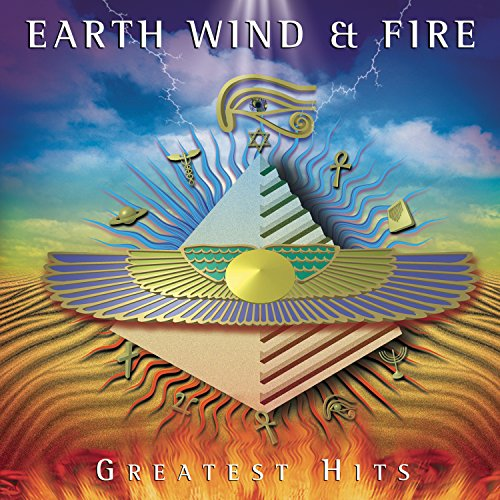

In [82]:
junkyardfire_all = licwaterlandvi.merge(junkyardfires, on="parcel_full", how="left")

In [83]:
junkyardfire_all

,parcel_full,licensetype_count,map_section_004N24,map_section_009S06,map_section_013S18,map_section_015S16,map_section_021N04,map_section_024N24,map_section_025S13,map_section_026S04,...,caserespon_NP,caserespon_NPU AFTER HOURS INVESTIGATOR,caserespon_NPU INVESTIGATOR,casepriori_CONSTRUCTION SERVICES,casepriori_HAZARDOUS,casepriori_IMMINENTLY DANGEROUS,casepriori_STANDARD,casepriori_UNLAWFUL,casepriori_UNSAFE,Fire
0,047S110010,5,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,4,0,3,NaN
1,047S170035,5,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,4,0,3,NaN
2,047S170026,5,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,4,0,3,NaN
3,047S210023,6,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN
4,047S210044,6,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163,009S060032,5,0,1,0,0,0,0,0,0,...,0,0,0,0,2,0,5,0,0,NaN
164,111N220010,5,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,15,0,0,1.0
165,047S200080,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,40,0,0,NaN
166,047S200071,5,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,8,0,0,NaN


In [84]:
#just making sure I have my geometry!
junkyardfire_all["geometry"]

0      POLYGON ((2679160.849 219790.732, 2679137.703 ...
1      POLYGON ((2678435.960 218926.501, 2678379.218 ...
2      POLYGON ((2679159.954 219790.563, 2679136.835 ...
3      POLYGON ((2680829.298 223301.310, 2680808.700 ...
4      POLYGON ((2680825.903 223299.337, 2680819.922 ...
                             ...                        
163    POLYGON ((2684634.992 231397.724, 2684640.581 ...
164    POLYGON ((2727858.623 261131.420, 2727876.458 ...
165    POLYGON ((2680390.397 223711.413, 2680288.056 ...
166    POLYGON ((2679266.293 223243.072, 2679413.183 ...
167    POLYGON ((2690335.698 240461.367, 2690321.702 ...
Name: geometry, Length: 168, dtype: geometry

## Filling Nas with 0

In [85]:
junkyardfire_all = junkyardfire_all.fillna(0)

In [86]:
junkyardfire_all.describe()

,licensetype_count,map_section_004N24,map_section_009S06,map_section_013S18,map_section_015S16,map_section_021N04,map_section_024N24,map_section_025S13,map_section_026S04,map_section_029S07,...,caserespon_NP,caserespon_NPU AFTER HOURS INVESTIGATOR,caserespon_NPU INVESTIGATOR,casepriori_CONSTRUCTION SERVICES,casepriori_HAZARDOUS,casepriori_IMMINENTLY DANGEROUS,casepriori_STANDARD,casepriori_UNLAWFUL,casepriori_UNSAFE,Fire
count,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,...,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000
mean,3.440476,0.005952,0.023810,0.005952,0.005952,0.005952,0.011905,0.005952,0.005952,0.005952,...,0.029762,0.047619,0.077381,0.059524,1.017857,0.053571,11.095238,0.017857,0.386905,0.035714
std,1.588516,0.077152,0.152911,0.077152,0.077152,0.077152,0.108782,0.077152,0.077152,0.077152,...,0.385758,0.617213,0.709196,0.497928,3.055325,0.516308,13.381656,0.231455,1.043518,0.186132
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000
50%,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.500000,0.000000,0.000000,0.000000
75%,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,15.000000,0.000000,0.000000,0.000000
max,9.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,5.000000,8.000000,7.000000,5.000000,23.000000,6.000000,71.000000,3.000000,6.000000,1.000000


# Running the Model!

## Isolate Target Variable (Fires) and Endogenous Variables

In [87]:
# y is target variable, fire yes/no
y = junkyardfire_all["Fire"].values

In [88]:
# X is endogenous variables
X = junkyardfire_all.drop("Fire", axis=1)

In [89]:
#realized I should drop geometry!
X = X.drop("geometry", axis=1)

In [90]:
# dropping our object
X = X.drop("parcel_full", axis=1)

In [91]:
# X is all in numeric formats, incl categorical variables
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 168 entries, 0 to 167
Columns: 235 entries, licensetype_count to casepriori_UNSAFE
dtypes: float64(4), int64(231)
memory usage: 309.8 KB


In [92]:
X.shape

(168, 235)

In [93]:
print("number of infinite values:", (np.isinf(X)).sum().sum())

number of infinite values: 0


In [94]:
print("number of infinite values:", (np.isinf(y)).sum().sum())

number of infinite values: 0


In [95]:
print("there are {} missing values in the X data".format(X.isnull().sum().sum()))

there are 0 missing values in the X data


## Split to Train Test

In [96]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.70, random_state=75)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((117, 235), (51, 235), (117,), (51,))

In [97]:
from sklearn import tree

In [98]:
from sklearn.ensemble import RandomForestClassifier
clf_rf = RandomForestClassifier(max_depth=2)
clf_rf.fit(X_train, y_train)
print("accuracy on training data {:.2}".format(clf_rf.score(X_train, y_train)))

accuracy on training data 0.95


I got accuracy of 1.0 in the training data, so I checked to make sure all of the target variable hadn't somehow become only zeros or ones.

In [99]:
y.max()

1.0

In [100]:
y.min()

0.0

### Ranking Variables to Find Why Model is Over Fitting

In [101]:
#this is how you see the importance of the features
clf_rf.feature_importances_[:10]

array([0.00578433, 0.00180028, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ])

In [102]:
index = np.argsort(clf_rf.feature_importances_)

In [103]:
columns = np.array(X.columns)[index]

In [104]:
sorted_column_names = X.columns[index]

In [105]:
print("there are so many columns in this version!: {}".format(len(columns)))

there are so many columns in this version!: 235


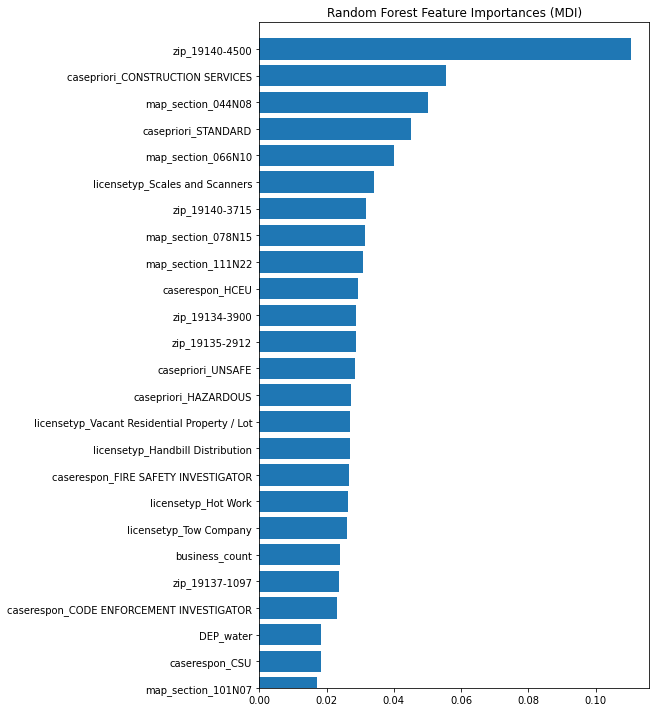

In [122]:
# plot the top ~50 features
y_ticks = np.arange(0, len(columns))
fig, ax = plt.subplots(figsize=(10,10))
ax.barh(y_ticks, clf_rf.feature_importances_[index])
ax.set_yticklabels(sorted_column_names)
ax.set_yticks(y_ticks)
ax.set_title("Random Forest Feature Importances (MDI)")
fig.tight_layout()
ax.set_ylim(210, len(columns))
plt.show()

# Analyzing Only Fire Locations

In [107]:
firelocations = gpd.GeoDataFrame.from_file("https://github.com/CoWoGeo/PUS2022_CWolk/raw/main/ProjectLanthamWolk/FireLicensesOHE.geojson")

In [118]:
firelocations.crs

<Derived Projected CRS: EPSG:2272>
Name: NAD83 / Pennsylvania South (ftUS)
Axis Info [cartesian]:
- X[east]: Easting (US survey foot)
- Y[north]: Northing (US survey foot)
Area of Use:
- name: United States (USA) - Pennsylvania - counties of Adams; Allegheny; Armstrong; Beaver; Bedford; Berks; Blair; Bucks; Butler; Cambria; Chester; Cumberland; Dauphin; Delaware; Fayette; Franklin; Fulton; Greene; Huntingdon; Indiana; Juniata; Lancaster; Lawrence; Lebanon; Lehigh; Mifflin; Montgomery; Northampton; Perry; Philadelphia; Schuylkill; Snyder; Somerset; Washington; Westmoreland; York.
- bounds: (-80.53, 39.71, -74.72, 41.18)
Coordinate Operation:
- name: SPCS83 Pennsylvania South zone (US Survey feet)
- method: Lambert Conic Conformal (2SP)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

# Plots and Figures

Feature importance
License and violation data for all fire locations
License and violation data for all scrapyards?
Plot of junkyard locations w color coding by active license, inactive, fire locations

Maybe use the zipcode map as base? zips = gpd.GeoDataFrame.from_file("https://opendata.arcgis.com/api/v3/datasets/b54ec5210cee41c3a884c9086f7af1be_0/downloads/data?format=shp&spatialRefId=4326")
zips.plot(ec = "k", fc="none");


In [109]:
censusblocks = gpd.GeoDataFrame.from_file("https://opendata.arcgis.com/datasets/e9e2e152bc1644e2af84927a8f4c3c06_0.zip")

In [110]:
licenseslocations = licenses[["parcel_full", "geometry"]]

In [111]:
print("The CRS of census blocks is", censusblocks.crs)

The CRS of census blocks is epsg:4326


In [112]:
# projecting to 2272
censusblocks = censusblocks.to_crs(2272)

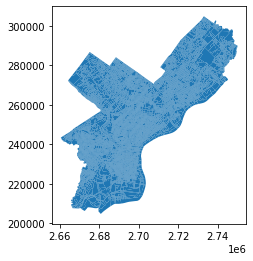

In [113]:
censusblocks.plot()

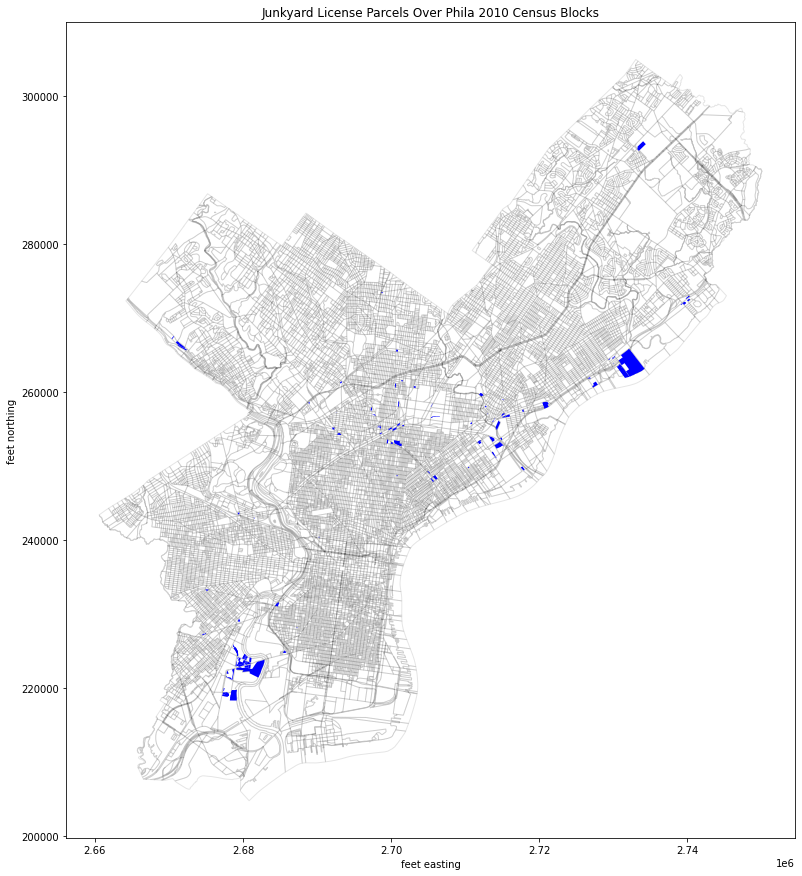

In [125]:
f, ax = plt.subplots(figsize=(15,15))
ax.set_xlabel("feet easting")
ax.set_ylabel("feet northing")
censusblocks.plot(ax=ax, color="None", edgecolor='k', alpha=0.1)
plt.title("Junkyard License Parcels Over Phila 2010 Census Blocks")
licenseslocations.plot(ax=ax, color="blue");

Below is a bad zoom in

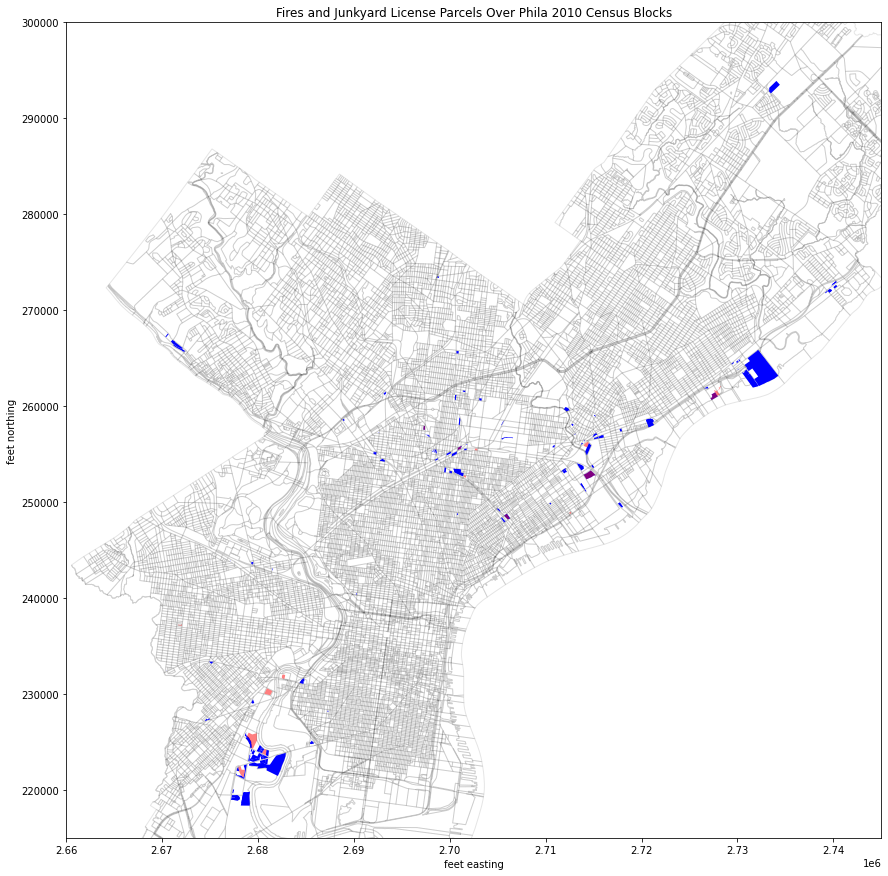

In [124]:
f, ax = plt.subplots(figsize=(15,15))
ax.set_xlabel("feet easting")
ax.set_ylabel("feet northing")
censusblocks.plot(ax=ax, color="None", edgecolor='k', alpha=0.1)
plt.title("Fires and Junkyard License Parcels Over Phila 2010 Census Blocks")
licenseslocations.plot(ax=ax, color="blue")
firelocations.plot(ax=ax, color="red", alpha=0.5)
ax.set_xlim(left=2.66*1e6, right=2.745*1e6)
ax.set_ylim(bottom=215000, top=300000);

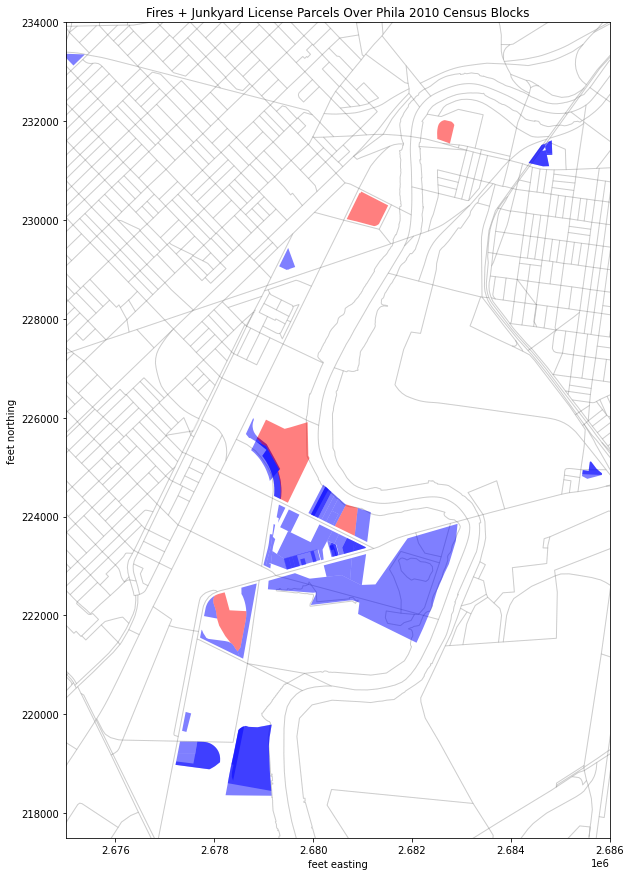

In [116]:
f, ax = plt.subplots(figsize=(10,15))
ax.set_xlabel("feet easting")
ax.set_ylabel("feet northing")
censusblocks.plot(ax=ax, color="None", edgecolor='k', alpha=0.1)
plt.title("Fires + Junkyard License Parcels Over Phila 2010 Census Blocks")
licenseslocations.plot(ax=ax, color="blue", alpha=0.5)
firelocations.plot(ax=ax, color="red", alpha=0.5)
ax.set_xlim(left=2.675*1e6, right=2.686*1e6)
ax.set_ylim(bottom=217500, top=234000);

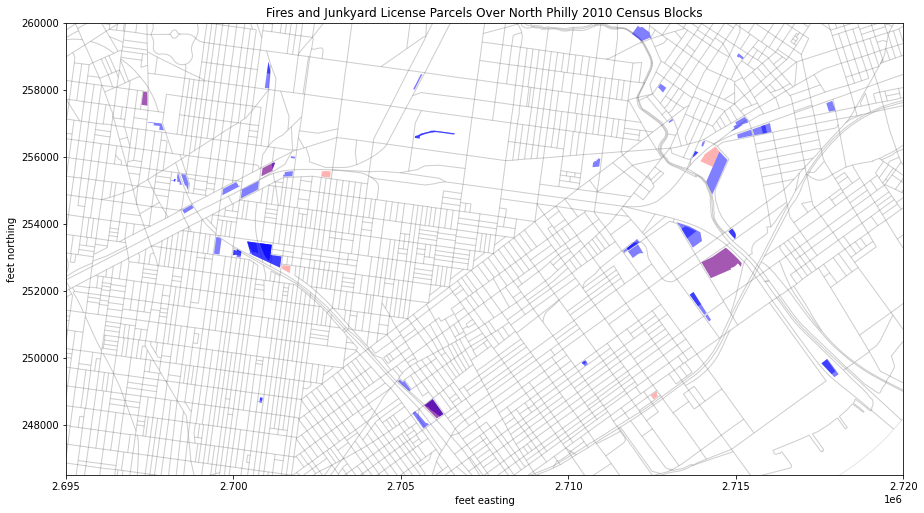

In [123]:
f, ax = plt.subplots(figsize=(15,15))
ax.set_xlabel("feet easting")
ax.set_ylabel("feet northing")
censusblocks.plot(ax=ax, color="None", edgecolor='k', alpha=0.1)
plt.title("Fires and Junkyard License Parcels Over North Philly 2010 Census Blocks")
licenseslocations.plot(ax=ax, color="blue", alpha=0.5)
firelocations.plot(ax=ax, color="red", alpha=0.3)
ax.set_xlim(left=2.695*1e6, right=2.72*1e6)
ax.set_ylim(bottom=246500, top=260000);